In [1]:
import pandas as pd
import numpy as np
import re
import random
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reading the form responses
data = pd.read_csv('synthetic_data.csv')
data = data[['role', 'frequency_of_travel', 'primary_purpose','ISB_Service', 'bus_stop_board', 'bus_stop_alight', 'day_of_the_week', 'time_start', 'travel_duration', 'frequency', 'punctuality', 'cleanliness', 'safety', 'coverage', 'crowdedness']]
data

,role,frequency_of_travel,primary_purpose,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness
0,Undergraduate student,Daily,Commute to classes,A2,Opp University Hall,Ventus,Friday,09:30:00,15 - 20 minutes,2,5,4,5,4,5
1,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,UTown,Thursday,09:30:00,10 - 15 minutes,4,3,4,3,4,1
2,Undergraduate student,3 - 4 days a week,Commute to classes,A2,UHC,S17,Thursday,17:50:00,< 5 minutes,2,4,4,3,4,3
3,Undergraduate student,3 - 4 days a week,Commute to classes,A1,PGP Terminal,Opp UHC,Sunday,11:30:00,10 - 15 minutes,4,4,4,4,2,5
4,Undergraduate student,1 - 2 days a week,Commute to classes,A1,KR MRT,LT27,Friday,07:50:00,< 5 minutes,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,K,KR MRT,CLB,Friday,09:24:30,5 - 10 minutes,2,3,4,2,4,4
55846,Visitor,Less than once a week,Travelling to food establishments,A1,KR MRT,CLB,Sunday,18:50:01,10 - 15 minutes,1,4,4,5,4,5
55847,Undergraduate student,1 - 2 days a week,Commute to classes,A1,LT13,KR MRT,Friday,11:41:45,5 - 10 minutes,2,4,5,3,4,4
55848,Undergraduate student,1 - 2 days a week,Commute to classes,A2,Opp YIH,S17,Tuesday,11:45:45,< 5 minutes,4,4,4,5,4,1


In [3]:
# First, group by 'bus_stop_board' and 'time_start' to count the number of people boarding at each stop and time
data['crowd'] = data.groupby(['bus_stop_board', 'time_start'])['ISB_Service'].transform('count')

# Drop the old 'crowdedness' column if no longer needed
data = data.drop(columns=['crowdedness'])
df = data # for later use
data

,role,frequency_of_travel,primary_purpose,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowd
0,Undergraduate student,Daily,Commute to classes,A2,Opp University Hall,Ventus,Friday,09:30:00,15 - 20 minutes,2,5,4,5,4,1
1,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,UTown,Thursday,09:30:00,10 - 15 minutes,4,3,4,3,4,3
2,Undergraduate student,3 - 4 days a week,Commute to classes,A2,UHC,S17,Thursday,17:50:00,< 5 minutes,2,4,4,3,4,1
3,Undergraduate student,3 - 4 days a week,Commute to classes,A1,PGP Terminal,Opp UHC,Sunday,11:30:00,10 - 15 minutes,4,4,4,4,2,1
4,Undergraduate student,1 - 2 days a week,Commute to classes,A1,KR MRT,LT27,Friday,07:50:00,< 5 minutes,4,3,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,K,KR MRT,CLB,Friday,09:24:30,5 - 10 minutes,2,3,4,2,4,4
55846,Visitor,Less than once a week,Travelling to food establishments,A1,KR MRT,CLB,Sunday,18:50:01,10 - 15 minutes,1,4,4,5,4,1
55847,Undergraduate student,1 - 2 days a week,Commute to classes,A1,LT13,KR MRT,Friday,11:41:45,5 - 10 minutes,2,4,5,3,4,1
55848,Undergraduate student,1 - 2 days a week,Commute to classes,A2,Opp YIH,S17,Tuesday,11:45:45,< 5 minutes,4,4,4,5,4,61


In [4]:
# Check the range of values in the 'crowd' variable
crowd_min = data['crowd'].min()
crowd_max = data['crowd'].max()
print("Crowd min:", crowd_min)
print("Crowd max:", crowd_max)

Crowd min: 1
Crowd max: 1853


In [5]:
# # Convert categorical variables to numerical if necessary, for example:
# for i in ['role', 'frequency_of_travel', 'primary_purpose', 'day_of_the_week', 'ISB_Service', 'time_start', 'bus_stop_board', 'bus_stop_alight', 'travel_duration']:
#     data[i] = pd.Categorical(data[i]).codes  

# # Calculate the correlation matrix
# corr_matrix = data.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))  # Set the figure size
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# # Add title and labels
# plt.title('Correlation Matrix', fontsize=16)
# plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Encode categorical features
df = pd.get_dummies(df, columns=['role', 'frequency_of_travel', 'primary_purpose', 
                                 'ISB_Service', 'bus_stop_board', 'bus_stop_alight', 
                                 'day_of_the_week', 'travel_duration', 'time_start'])

# Scale the target variable `crowd` with MinMaxScaler
crowd_scaler = MinMaxScaler()
df['crowd'] = crowd_scaler.fit_transform(df[['crowd']])

# Scale other features
feature_scaler = StandardScaler()
df_scaled = feature_scaler.fit_transform(df.drop(columns=['crowd']))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns.drop('crowd'))

# Add the scaled `crowd` column back to the DataFrame
df_scaled['crowd'] = df['crowd']

# Prepare lag features for `crowd`
df_scaled['crowd_lag_1'] = df_scaled['crowd'].shift(1)
df_scaled = df_scaled.dropna()  # Drop any rows with NaN values from lagging
df_scaled

,frequency,punctuality,cleanliness,safety,coverage,role_Staff,role_Undergraduate student,role_Visitor,frequency_of_travel_1 - 2 days a week,frequency_of_travel_3 - 4 days a week,...,time_start_20:43:48,time_start_20:43:54,time_start_20:44:01,time_start_20:44:08,time_start_20:44:45,time_start_20:44:56,time_start_20:45:43,time_start_20:45:45,crowd,crowd_lag_1
1,1.205224,-0.529786,0.022185,-0.440985,0.333880,-0.108345,0.300940,-0.277377,-0.557676,1.139121,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.001080,0.000000
2,-0.731443,0.608454,0.022185,-0.440985,0.333880,-0.108345,0.300940,-0.277377,-0.557676,1.139121,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.000000,0.001080
3,1.205224,0.608454,0.022185,0.598039,-2.113097,-0.108345,0.300940,-0.277377,-0.557676,1.139121,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.000000,0.000000
4,1.205224,-0.529786,0.022185,0.598039,0.333880,-0.108345,0.300940,-0.277377,1.793157,-0.877870,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.001080,0.000000
5,1.205224,0.608454,-3.849788,-0.440985,0.333880,-0.108345,0.300940,-0.277377,1.793157,-0.877870,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.000000,0.001080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,-0.731443,-0.529786,0.022185,-1.480010,0.333880,-0.108345,0.300940,-0.277377,-0.557676,-0.877870,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.001620,0.482181
55846,-1.699777,0.608454,0.022185,1.637063,0.333880,-0.108345,-3.322925,3.605204,-0.557676,-0.877870,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.000000,0.001620
55847,-0.731443,0.608454,1.312842,-0.440985,0.333880,-0.108345,0.300940,-0.277377,1.793157,-0.877870,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.000000,0.000000
55848,1.205224,0.608454,0.022185,1.637063,0.333880,-0.108345,0.300940,-0.277377,1.793157,-0.877870,...,-0.005984,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.004231,-0.168054,0.032397,0.000000


In [7]:
# Split data into train and test sets
X = df.drop(columns=['crowd'])
y = df['crowd']

# First, save indices of the entire dataset
original_indices = df.index

# Perform train-test split
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, original_indices, test_size=0.2, shuffle=False
)


X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Flatten y_train if necessary (to make it 1D)
y_train = y_train.values.flatten()

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer with one unit for predicted crowd
model.compile(optimizer='adam', loss='mse')


# Convert to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_train = np.array(y_train).flatten().astype(np.float32)
y_test = np.array(y_test).flatten().astype(np.float32)
# Check data types
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Fill NaNs if necessary
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Forecast on test data
y_pred = model.predict(X_test)

y_pred = np.clip(y_pred, a_min=0, a_max=None)
y_pred

/Users/LeeJingHuiMegan_1/Documents/Optimizing-Public-Transport-Data/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


float32 float32 float32 float32
Epoch 1/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0198 - val_loss: 1.0004e-04
Epoch 2/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 3.9311e-04 - val_loss: 1.8024e-04
Epoch 3/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 1.3583e-04 - val_loss: 4.9794e-04
Epoch 4/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 1.9606e-04 - val_loss: 6.0963e-05
Epoch 5/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1.5178e-04 - val_loss: 5.0439e-05
Epoch 6/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1.5530e-04 - val_loss: 2.7484e-05
Epoch 7/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 7.3572e-05 - val_loss: 2.8534e-05
Epoch 8/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 7.9111e-05 - val_loss: 6.9640e-05
Epoch 9/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 7.4656e-05 - val_loss: 6.1294e-05
Epoch 10/10
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 1.3061e-05 - val_loss: 5.

array([[0.01882415],
       [0.71052134],
       [0.0033564 ],
       ...,
       [0.        ],
       [0.02901286],
       [0.02120424]], dtype=float32)

In [8]:
test_indices_df = pd.DataFrame(test_indices, columns=['index'])

In [9]:
# Inverse transform the predicted crowd to get back to the original scale
y_pred_actual = crowd_scaler.inverse_transform(y_pred.reshape(-1, 1))  # reshape to 2D for inverse_transform

y_pred_series = pd.Series(y_pred_actual.flatten(), index=test_indices)
data.loc[test_indices, 'predicted_crowd'] = y_pred_series

In [10]:
predicted_crowd_min = data['predicted_crowd'].min()
predicted_crowd_max = data['predicted_crowd'].max()
print("Crowd min:", predicted_crowd_min)
print("Crowd max:", predicted_crowd_max)

Crowd min: 1.0
Crowd max: 1863.7484


In [11]:
data = data.dropna(subset=['predicted_crowd'])
data

,role,frequency_of_travel,primary_purpose,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowd,predicted_crowd
44680,Undergraduate student,3 - 4 days a week,Commute to classes,A1,LT13,KR MRT,Friday,16:42:17,10 - 15 minutes,3,4,4,2,5,35,35.862320
44681,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,Opp KR MRT,Tuesday,18:42:17,10 - 15 minutes,2,5,5,3,4,1310,1316.885498
44682,Undergraduate student,Daily,Commute to classes,D1,UTown,CLB,Monday,18:04:37,20 - 30 minutes,4,4,4,4,4,1,7.216051
44683,Undergraduate student,Daily,Commute to classes,D1,LT13,COM3,Thursday,09:09:09,10 - 15 minutes,3,4,4,4,5,1,1.000000
44684,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,UTown,Thursday,12:45:45,5 - 10 minutes,3,3,4,3,4,1337,1335.888428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,K,KR MRT,CLB,Friday,09:24:30,5 - 10 minutes,2,3,4,2,4,4,6.926428
55846,Visitor,Less than once a week,Travelling to food establishments,A1,KR MRT,CLB,Sunday,18:50:01,10 - 15 minutes,1,4,4,5,4,1,26.919994
55847,Undergraduate student,1 - 2 days a week,Commute to classes,A1,LT13,KR MRT,Friday,11:41:45,5 - 10 minutes,2,4,5,3,4,1,1.000000
55848,Undergraduate student,1 - 2 days a week,Commute to classes,A2,Opp YIH,S17,Tuesday,11:45:45,< 5 minutes,4,4,4,5,4,61,54.731815


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time_start' to datetime format to extract the hour
data['time_start'] = pd.to_datetime(data['time_start'])
data['hour'] = data['time_start'].dt.hour

# Create a new column combining 'day_of_the_week' and 'hour' for x-axis
data['day_hour'] = data['day_of_the_week'] + ' ' + data['hour'].astype(str) + ':00'

# Sort by 'day_of_the_week' (assuming you want the order Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_the_week'] = pd.Categorical(data['day_of_the_week'], categories=days_order, ordered=True)
data = data.sort_values(by=['day_of_the_week', 'hour'])

/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_96419/2307533208.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_start'] = pd.to_datetime(data['time_start'])
/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_96419/2307533208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_start'] = pd.to_datetime(data['time_start'])
/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_96419/2307533208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [13]:
data

,role,frequency_of_travel,primary_purpose,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowd,predicted_crowd,hour,day_hour
44750,Undergraduate student,1 - 2 days a week,Commute to classes,K,Opp KR MRT,PGP Foyer,Monday,2024-11-10 07:45:45,20 - 30 minutes,3,4,5,4,4,49,57.140751,7,Monday 7:00
44783,Undergraduate student,Daily,Commute to classes,BTC (Bukit Timah Campus),LT27,CLB,Monday,2024-11-10 07:45:45,10 - 15 minutes,2,3,3,3,4,56,59.461864,7,Monday 7:00
44858,Undergraduate student,Daily,Commute to classes,D2,KR MRT,COM3,Monday,2024-11-10 07:45:45,5 - 10 minutes,2,3,4,3,4,402,409.083160,7,Monday 7:00
45031,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,LT27,Monday,2024-11-10 07:45:45,5 - 10 minutes,4,4,4,3,4,402,406.639038,7,Monday 7:00
45404,Undergraduate student,Daily,Commute to classes,BTC (Bukit Timah Campus),KR MRT,CLB,Monday,2024-11-10 07:45:45,< 5 minutes,3,3,5,3,4,402,405.366882,7,Monday 7:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51049,Undergraduate student,3 - 4 days a week,Travelling to food establishments,D2,KR MRT,Opp KR MRT,Sunday,2024-11-10 20:45:45,10 - 15 minutes,4,3,5,3,4,699,686.202881,20,Sunday 20:00
53331,Undergraduate student,Daily,Commute to classes,A1,KR MRT,CLB,Sunday,2024-11-10 20:42:17,< 5 minutes,4,4,4,4,4,1112,1101.901123,20,Sunday 20:00
53779,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,UTown,Sunday,2024-11-10 20:45:45,< 5 minutes,3,4,4,4,5,699,693.622009,20,Sunday 20:00
53864,Undergraduate student,1 - 2 days a week,Commute to classes,K,KR MRT,CLB,Sunday,2024-11-10 20:42:17,5 - 10 minutes,2,4,3,3,4,1112,1110.545410,20,Sunday 20:00


In [14]:
# # Plotting
# plt.figure(figsize=(12, 6))
# plt.plot(data['day_hour'], data['predicted_crowd'], color='skyblue')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=90)

# # Adding labels and title
# plt.xlabel('Day of the Week and Hour')
# plt.ylabel('Predicted Crowd')
# plt.title('Predicted Crowd Over Time by Day of the Week and Hour')

# # Adjust layout to prevent overlap and ensure tight plotting
# plt.tight_layout()

# plt.show()

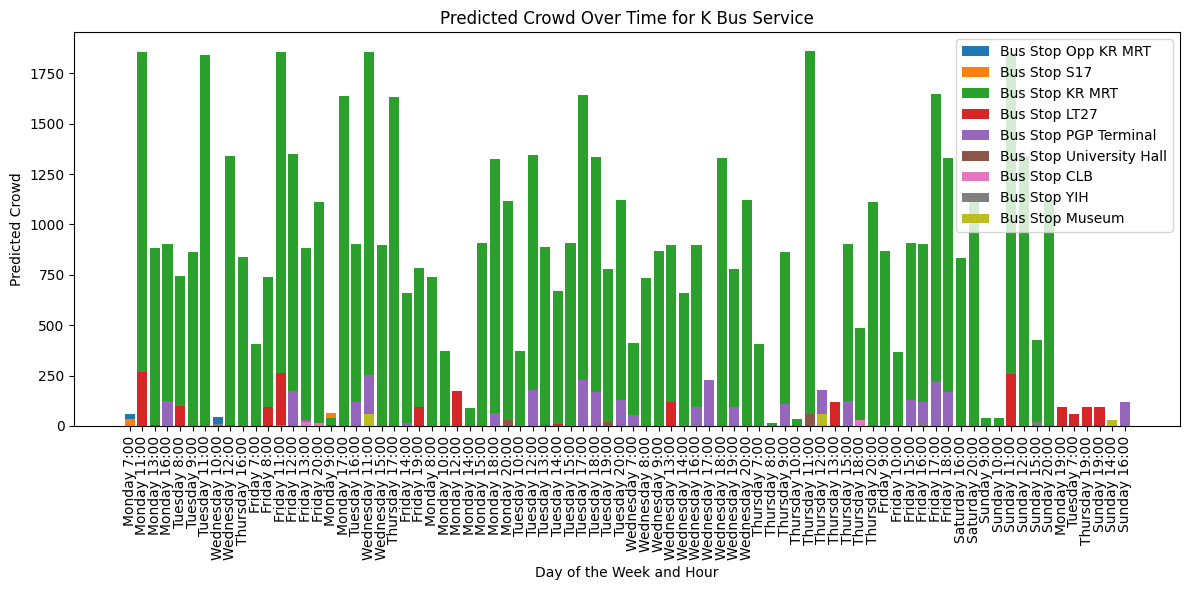

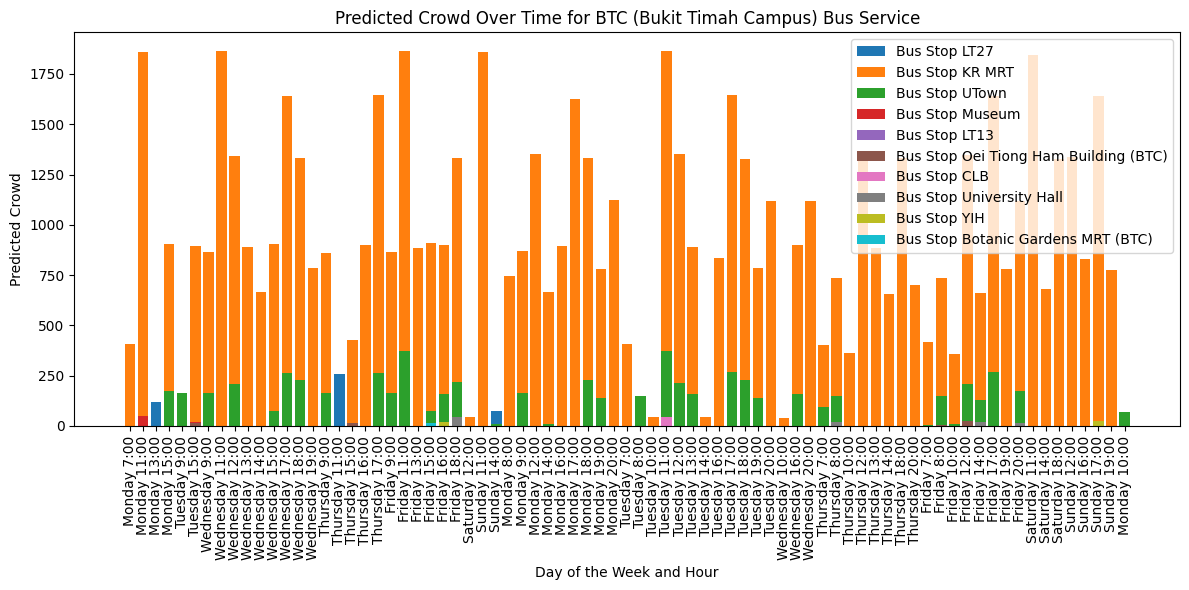

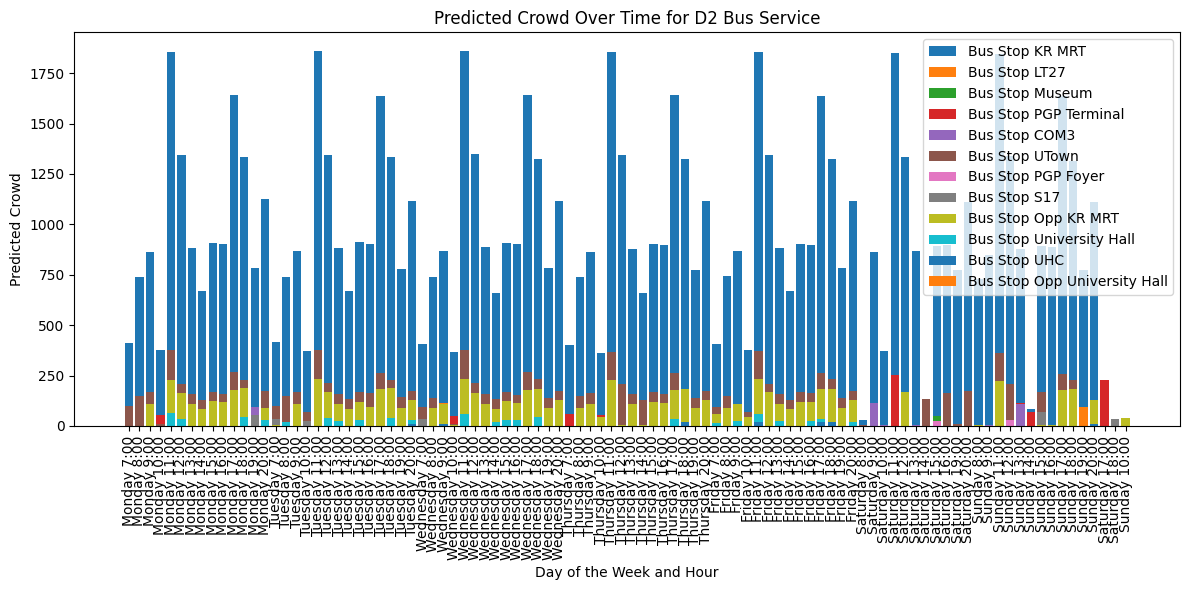

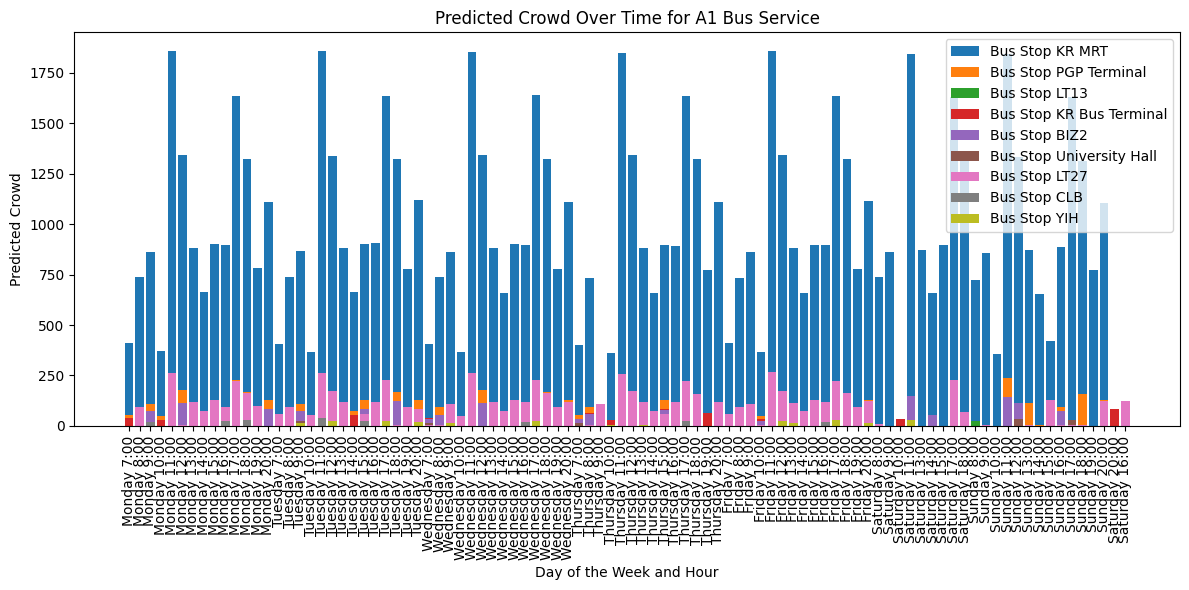

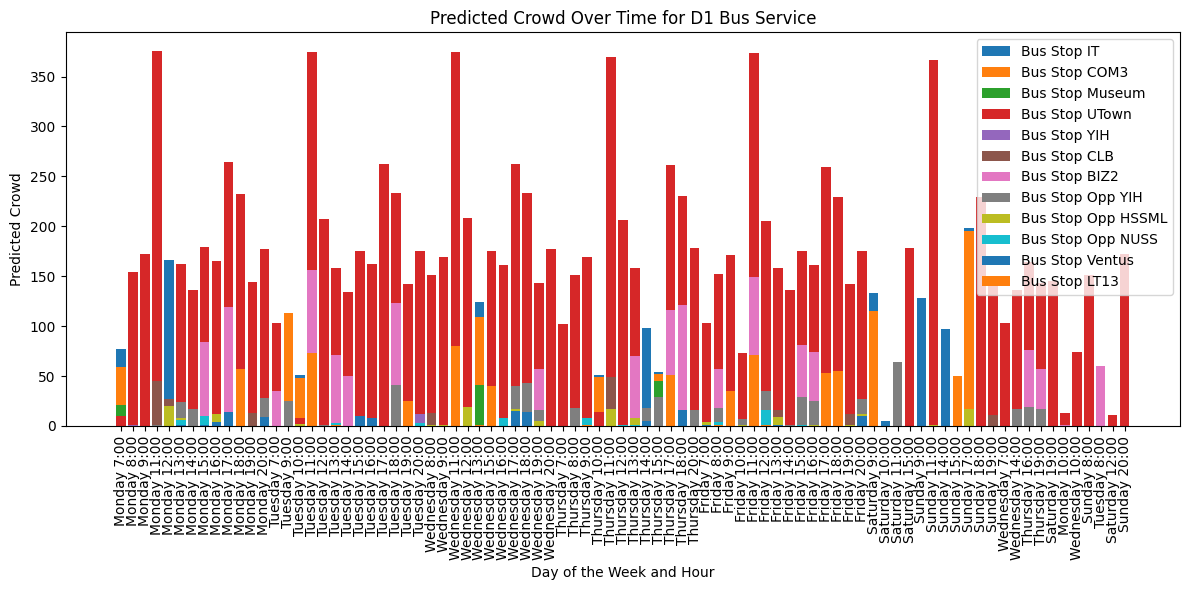

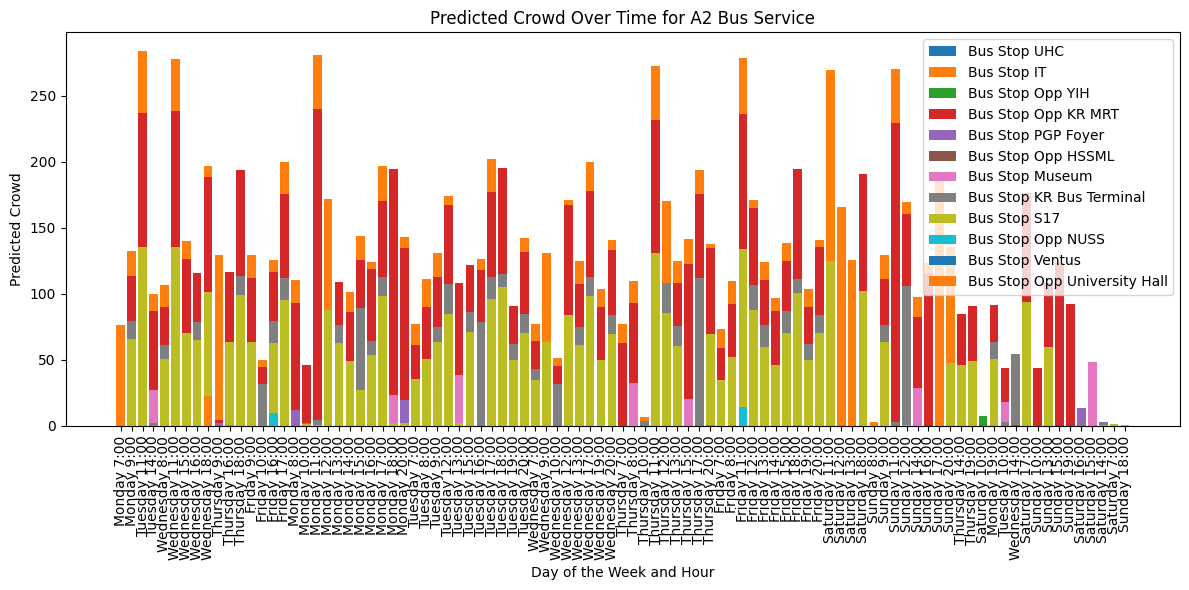

In [16]:
# Group by bus service
bus_services = data['ISB_Service'].unique()  # Assuming the column name is 'bus_service'

# Plot for each bus service
for service in bus_services:
    # Filter data for the current bus service
    service_data = data[data['ISB_Service'] == service]
    
    # Get unique bus stops for this bus service
    bus_stops = service_data['bus_stop_board'].unique()  # Assuming the column name is 'bus_stop'
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot one line for each bus stop within the bus service
    for stop in bus_stops:
        stop_data = service_data[service_data['bus_stop_board'] == stop]
        plt.bar(stop_data['day_hour'], stop_data['predicted_crowd'], label=f'Bus Stop {stop}')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Adding labels and title
    plt.xlabel('Day of the Week and Hour')
    plt.ylabel('Predicted Crowd')
    plt.title(f'Predicted Crowd Over Time for {service} Bus Service')

    # Adding legend for each bus stop line
    plt.legend()

    # Adjust layout to prevent overlap and ensure tight plotting
    plt.tight_layout()

    # Show plot for this bus service
    plt.show()